In [1]:
import sys
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def readfile(filepath):
    f = open(filepath) # filepath = '9models/gru_adam_log.txt'
    result = np.zeros([40,4])
    i = 0
    line = f.readline()
    while line:
        num = re.findall('\d*\.\d*',line)
        for j in range(len(num)):
            result[i,j] = float(num[j])
        line = f.readline()
        i += 1
    return result
    f.close()

In [7]:
def drawontime(result, train_name, val_name, fig_name):
    n,m = result.shape
    x = n
    train_ppl = result[:,0]
    val_ppl = result[:,1]
    time = np.zeros(n)
    time[0] = result[0,-1]
    for i in range(n-1):
        time[i+1] = time[i]+result[i+1,-1]
    plt.plot(time,train_ppl,'-',label=train_name)
    plt.plot(time,val_ppl,'-.',label=val_name)
    plt.xlabel('wall-clock-time')
    plt.ylabel("PPL")
    plt.title(fig_name)
    plt.legend(loc='upper right')
    plt.grid(b=True, which='major', color='#666666', linestyle='-')

In [8]:
def drawonepoch(filepath, train_name, val_name, fig_name):
    matrix_ga = np.load(filepath) #filepath = '9models/gru_adam_lc.npy'
    y_ga_t = matrix_ga.item()['train_ppls']
    y_ga_v = matrix_ga.item()['val_ppls']
    x = np.arange(len(y_ga_t))
    plt.plot(x,y_ga_t,label=train_name)
    plt.plot(x,y_ga_v,label=val_name)
    plt.xlabel('epoch')
    plt.ylabel("PPL")
    plt.title(fig_name)
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.legend(loc='upper right')

In [33]:
def drawonepoch_last(filepath, train_name, val_name, fig_name):
    matrix_ga = np.load(filepath) #filepath = '9models/gru_adam_lc.npy'
    y_ga_t = matrix_ga.item()['train_ppls']
    y_ga_v = matrix_ga.item()['val_ppls']
    n = len(y_ga_t)
    x = np.arange(n-10,n)
    plt.plot(x,y_ga_t[n-10:n],label=train_name)
    plt.plot(x,y_ga_v[n-10:n],label=val_name)
    plt.xlabel('epoch')
    plt.ylabel("PPL")
    plt.title(fig_name)
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.legend(loc='upper right')

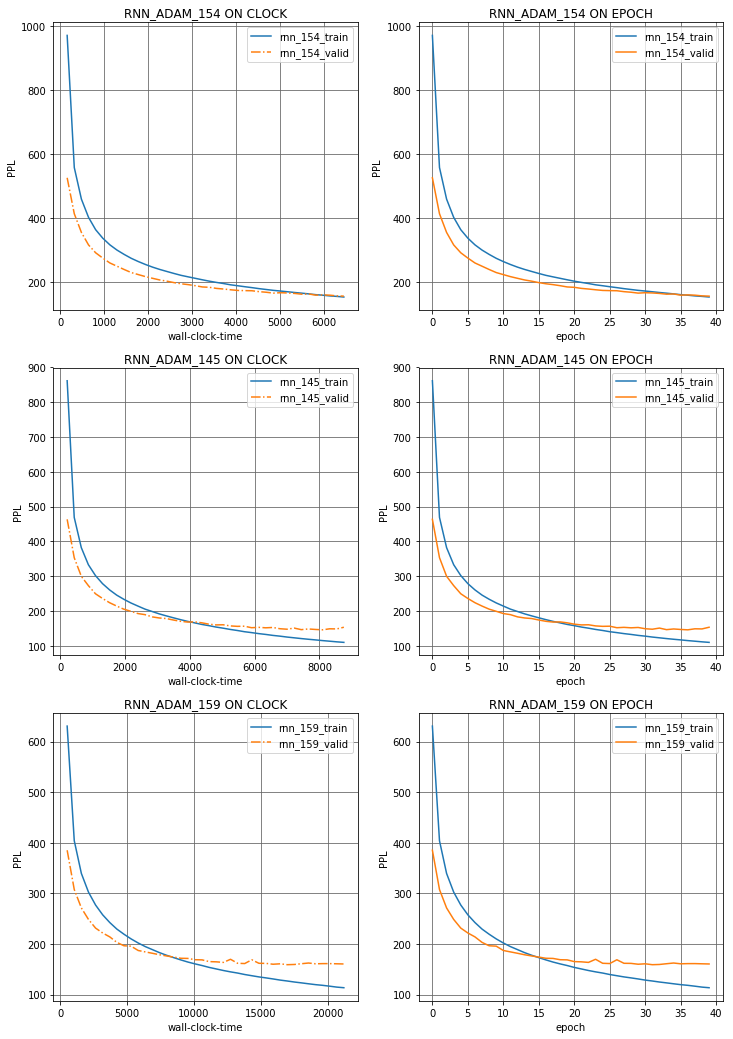

In [45]:
# 2 new rnn
result_ra_new1 = readfile('new_models/RNN_ADAM_154/log.txt')
result_ra_new2 = readfile('new_models/RNN_ADAM_145/log.txt')
result_ra_new3 = readfile('new_models/RNN_ADAM_159/log.txt')
plt.figure(figsize=(12,18))
plt.subplot(321)
drawontime(result_ra_new1,"rnn_154_train","rnn_154_valid","RNN_ADAM_154 ON CLOCK")
plt.subplot(322)
drawonepoch('new_models/RNN_ADAM_154/learning_curves.npy',"rnn_154_train","rnn_154_valid","RNN_ADAM_154 ON EPOCH")
plt.subplot(323)
drawontime(result_ra_new2,"rnn_145_train","rnn_145_valid","RNN_ADAM_145 ON CLOCK")
plt.subplot(324)
drawonepoch('new_models/RNN_ADAM_145/learning_curves.npy',"rnn_145_train","rnn_145_valid","RNN_ADAM_145 ON EPOCH")
plt.subplot(325)
drawontime(result_ra_new3,"rnn_159_train","rnn_159_valid","RNN_ADAM_159 ON CLOCK")
plt.subplot(326)
drawonepoch('new_models/RNN_ADAM_159/learning_curves.npy',"rnn_159_train","rnn_159_valid","RNN_ADAM_159 ON EPOCH")

Text(0.5,1,'COMPARISON 4 RNN (the model in 4.1 and three models we exploited) ON LAST 10 EPOCH')

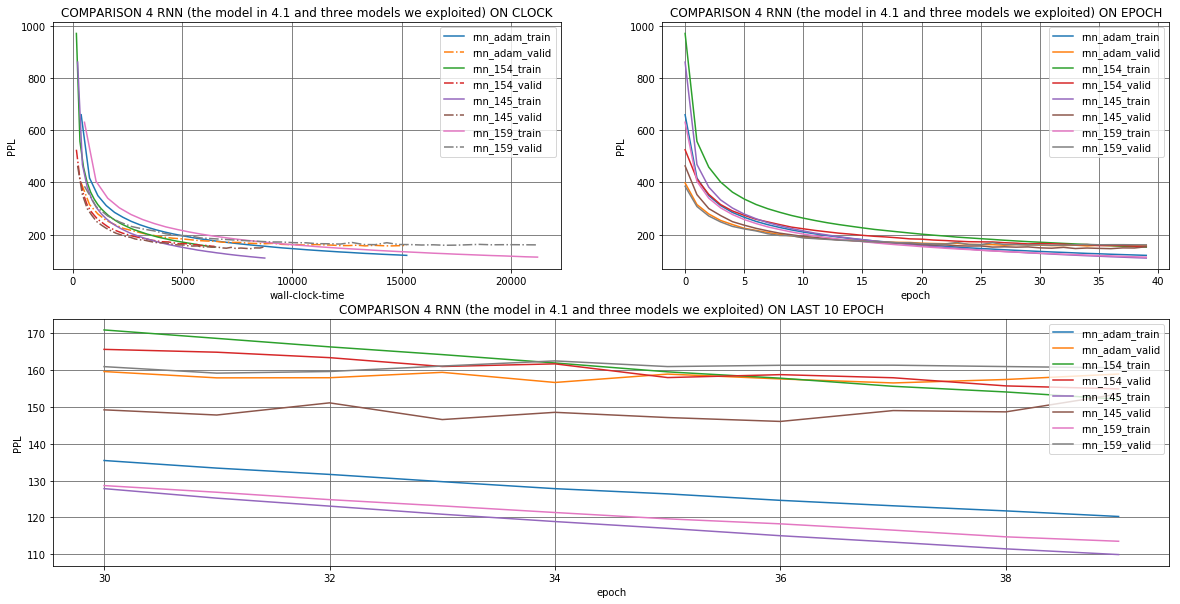

In [41]:
# compare 3 rnn
result_ra = readfile('9models/rnn_adam_log.txt')
result_ra_new1 = readfile('new_models/RNN_ADAM_154/log.txt')
result_ra_new2 = readfile('new_models/RNN_ADAM_145/log.txt')
result_ra_new3 = readfile('new_models/RNN_ADAM_159/log.txt')
plt.figure(figsize=(20,10))
plt.subplot(221)
drawontime(result_ra,"rnn_adam_train","rnn_adam_valid","RNN_ADAM ON CLOCK")
drawontime(result_ra_new1,"rnn_154_train","rnn_154_valid","RNN_ADAM_154 ON CLOCK")
drawontime(result_ra_new2,"rnn_145_train","rnn_145_valid","RNN_ADAM_145 ON CLOCK")
drawontime(result_ra_new3,"rnn_159_train","rnn_159_valid","RNN_ADAM_159 ON CLOCK")
plt.title('COMPARISON 4 RNN (the model in 4.1 and three models we exploited) ON CLOCK')
plt.subplot(222)
drawonepoch('9models/rnn_adam_lc.npy',"rnn_adam_train","rnn_adam_valid","RNN_ADAM ON EPOCH")
drawonepoch('new_models/RNN_ADAM_154/learning_curves.npy',"rnn_154_train","rnn_154_valid","RNN_ADAM_154 ON EPOCH")
drawonepoch('new_models/RNN_ADAM_145/learning_curves.npy',"rnn_145_train","rnn_145_valid","RNN_ADAM_145 ON EPOCH")
drawonepoch('new_models/RNN_ADAM_159/learning_curves.npy',"rnn_159_train","rnn_159_valid","RNN_ADAM_159 ON EPOCH")

plt.title('COMPARISON 4 RNN (the model in 4.1 and three models we exploited) ON EPOCH')
plt.subplot(212)
drawonepoch_last('9models/rnn_adam_lc.npy',"rnn_adam_train","rnn_adam_valid","RNN_ADAM ON EPOCH")
drawonepoch_last('new_models/RNN_ADAM_154/learning_curves.npy',"rnn_154_train","rnn_154_valid","RNN_ADAM_154 ON EPOCH")
drawonepoch_last('new_models/RNN_ADAM_145/learning_curves.npy',"rnn_145_train","rnn_145_valid","RNN_ADAM_145 ON EPOCH")
drawonepoch_last('new_models/RNN_ADAM_159/learning_curves.npy',"rnn_159_train","rnn_159_valid","RNN_ADAM_159 ON EPOCH")
plt.title('COMPARISON 4 RNN (the model in 4.1 and three models we exploited) ON LAST 10 EPOCH')

Text(0.5,1,'TRANSFORMER WITH ADAM BEST VAL PPL 121 ON EPOCH')

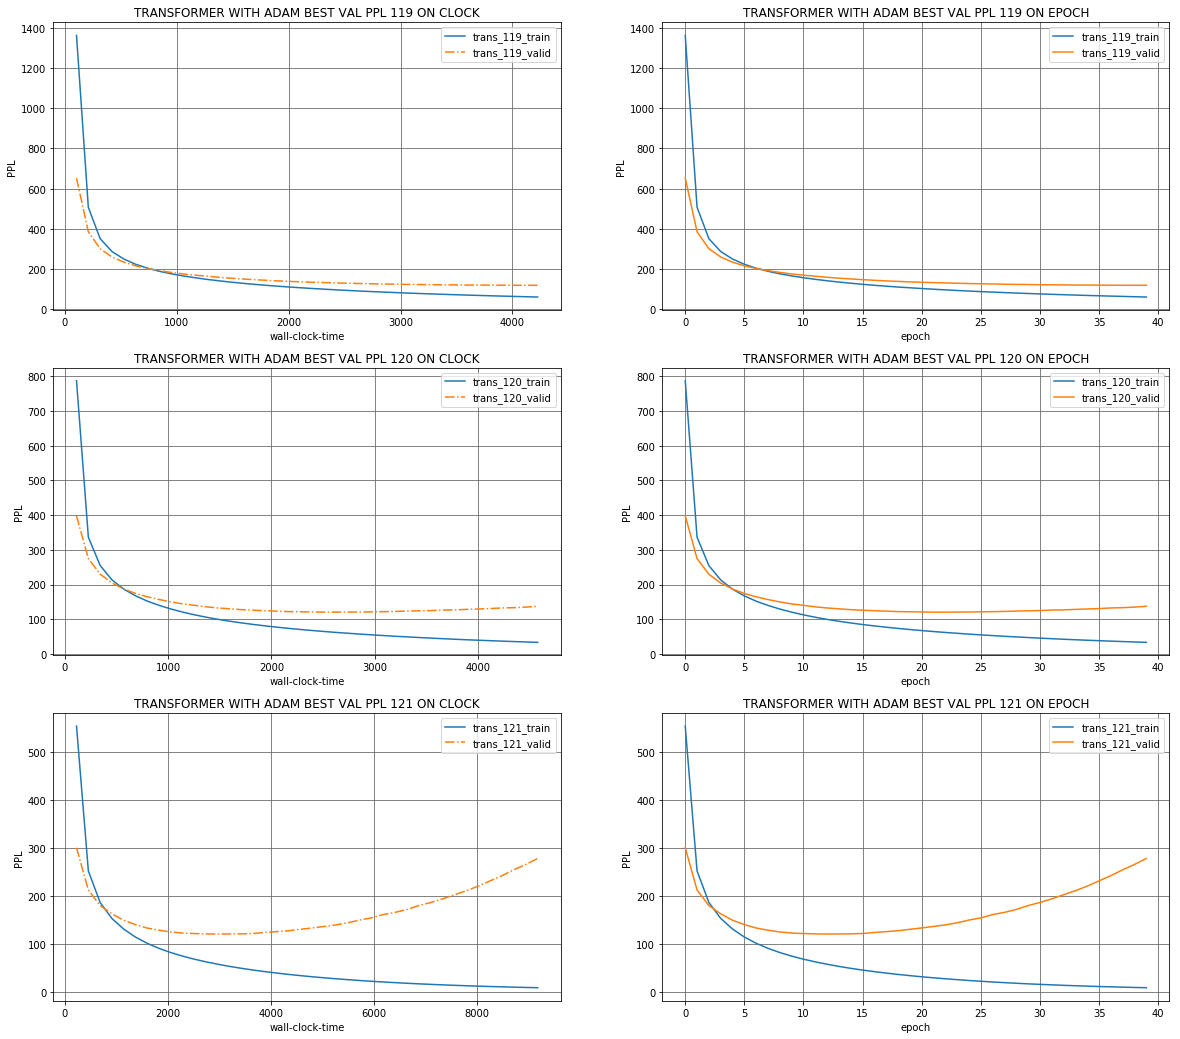

In [48]:
# 3 NEW transformer
result_tsls = readfile('9models/tran_sls_log.txt')
result_ta_119 = readfile('new_models/TRANS_ADAM_119/log.txt')
result_ta_120 = readfile('new_models/TRANS_ADAM_120/log.txt')
result_ta_121 = readfile('new_models/TRANS_ADAM_121/log.txt')
plt.figure(figsize=(20,18))
plt.subplot(321)
drawontime(result_ta_119,"trans_119_train","trans_119_valid","TRAN_ADAM_119 ON CLOCK")
plt.title('TRANSFORMER WITH ADAM BEST VAL PPL 119 ON CLOCK')
plt.subplot(322)
drawonepoch('new_models/TRANS_ADAM_119/learning_curves.npy',"trans_119_train","trans_119_valid","TRAN_ADAM_119 ON EPOCH")
plt.title('TRANSFORMER WITH ADAM BEST VAL PPL 119 ON EPOCH')
plt.subplot(323)
drawontime(result_ta_120,"trans_120_train","trans_120_valid","TRAN_ADAM_120 ON CLOCK")
plt.title('TRANSFORMER WITH ADAM BEST VAL PPL 120 ON CLOCK')
plt.subplot(324)
drawonepoch('new_models/TRANS_ADAM_120/learning_curves.npy',"trans_120_train","trans_120_valid","TRAN_ADAM_120 ON EPOCH")
plt.title('TRANSFORMER WITH ADAM BEST VAL PPL 120 ON EPOCH')
plt.subplot(325)
drawontime(result_ta_121,"trans_121_train","trans_121_valid","TRAN_ADAM_121 ON CLOCK")
plt.title('TRANSFORMER WITH ADAM BEST VAL PPL 121 ON CLOCK')
plt.subplot(326)
drawonepoch('new_models/TRANS_ADAM_121/learning_curves.npy',"trans_121_train","trans_121_valid","TRAN_ADAM_121 ON EPOCH")
plt.title('TRANSFORMER WITH ADAM BEST VAL PPL 121 ON EPOCH')

Text(0.5,1,'COMPARISON TRANSFORMER MODEL IN 4.1 AND THREE NEW TRANSFORMER WITH ADAM ON EPOCH')

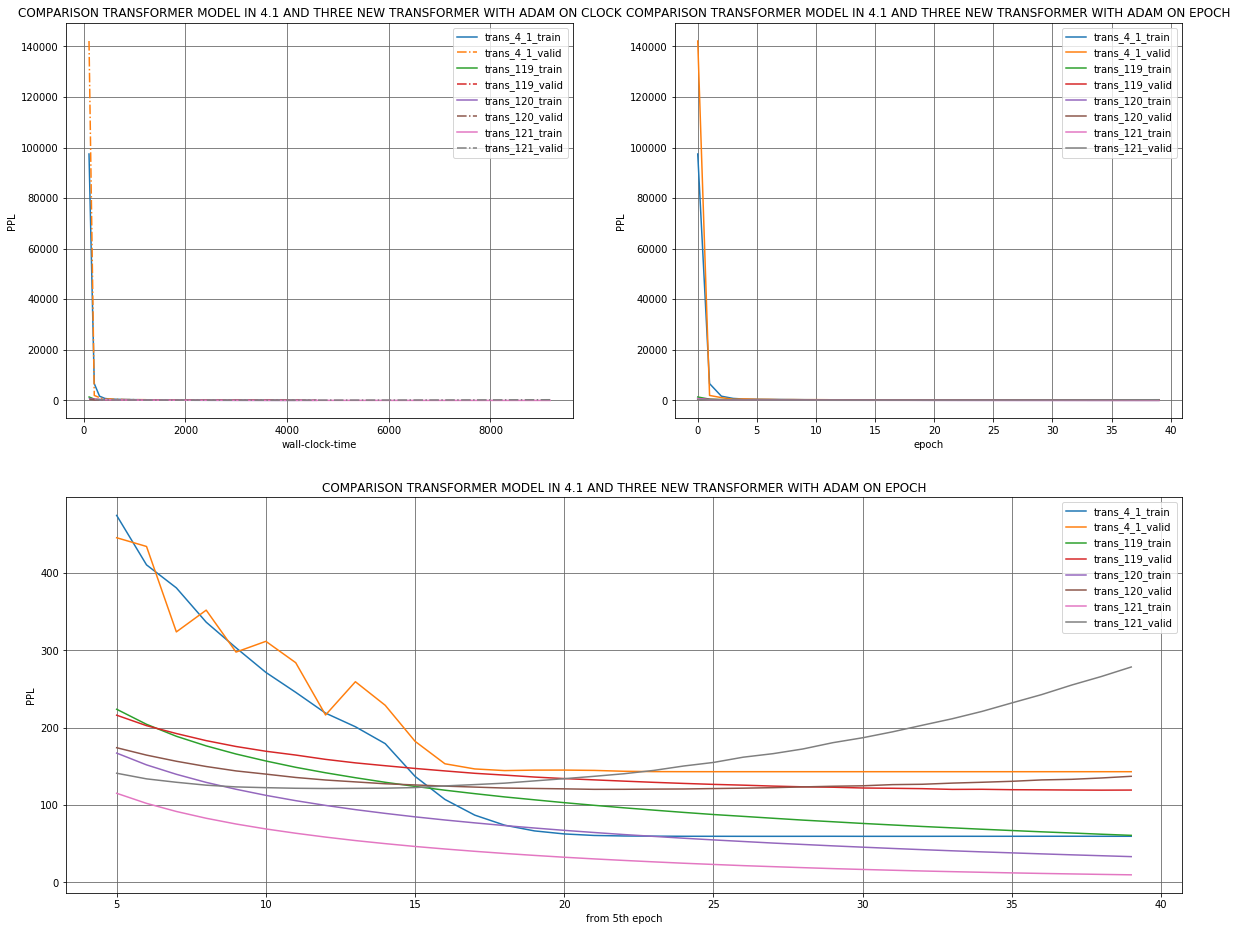

In [62]:
# comparison transformer
result_tsls = readfile('9models/tran_sls_log.txt')
result_ta_119 = readfile('new_models/TRANS_ADAM_119/log.txt')
result_ta_120 = readfile('new_models/TRANS_ADAM_120/log.txt')
result_ta_121 = readfile('new_models/TRANS_ADAM_121/log.txt')
plt.figure(figsize=(20,16))
plt.subplot(221)
drawontime(result_tsls,"trans_4_1_train","trans_4_1_valid","TRAN_ADAM_4_1 ON CLOCK")
drawontime(result_ta_119,"trans_119_train","trans_119_valid","TRAN_ADAM_119 ON CLOCK")
drawontime(result_ta_120,"trans_120_train","trans_120_valid","TRAN_ADAM_120 ON CLOCK")
drawontime(result_ta_121,"trans_121_train","trans_121_valid","TRAN_ADAM_121 ON CLOCK")
plt.title('COMPARISON TRANSFORMER MODEL IN 4.1 AND THREE NEW TRANSFORMER WITH ADAM ON CLOCK')

plt.subplot(222)
drawonepoch('9models/tran_sls_lc.npy',"trans_4_1_train","trans_4_1_valid","TRAN_ADAM_4_1 ON CLOCK")
drawonepoch('new_models/TRANS_ADAM_119/learning_curves.npy',"trans_119_train","trans_119_valid","TRAN_ADAM_119 ON EPOCH")
drawonepoch('new_models/TRANS_ADAM_120/learning_curves.npy',"trans_120_train","trans_120_valid","TRAN_ADAM_120 ON EPOCH")
drawonepoch('new_models/TRANS_ADAM_121/learning_curves.npy',"trans_121_train","trans_121_valid","TRAN_ADAM_121 ON EPOCH")
plt.title('COMPARISON TRANSFORMER MODEL IN 4.1 AND THREE NEW TRANSFORMER WITH ADAM ON EPOCH')

plt.subplot(212)
drawonepoch_from5('9models/tran_sls_lc.npy',"trans_4_1_train","trans_4_1_valid","TRAN_ADAM_4_1 ON CLOCK")
drawonepoch_from5('new_models/TRANS_ADAM_119/learning_curves.npy',"trans_119_train","trans_119_valid","TRAN_ADAM_119 ON EPOCH")
drawonepoch_from5('new_models/TRANS_ADAM_120/learning_curves.npy',"trans_120_train","trans_120_valid","TRAN_ADAM_120 ON EPOCH")
drawonepoch_from5('new_models/TRANS_ADAM_121/learning_curves.npy',"trans_121_train","trans_121_valid","TRAN_ADAM_121 ON EPOCH")

plt.title('COMPARISON TRANSFORMER MODEL IN 4.1 AND THREE NEW TRANSFORMER WITH ADAM ON EPOCH')


In [56]:
def drawonepoch_from5(filepath, train_name, val_name, fig_name):
    matrix_ga = np.load(filepath) #filepath = '9models/gru_adam_lc.npy'
    y_ga_t = matrix_ga.item()['train_ppls']
    y_ga_v = matrix_ga.item()['val_ppls']
    n = len(y_ga_t)
    x = np.arange(5,n)
    plt.plot(x,y_ga_t[5:n],label=train_name)
    plt.plot(x,y_ga_v[5:n],label=val_name)
    plt.xlabel('from 5th epoch')
    plt.ylabel("PPL")
    plt.title(fig_name)
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.legend(loc='upper right')

Text(0.5,1,'GRU WITH SGD_LR_SC BEST VAL PPL 103 ON EPOCH')

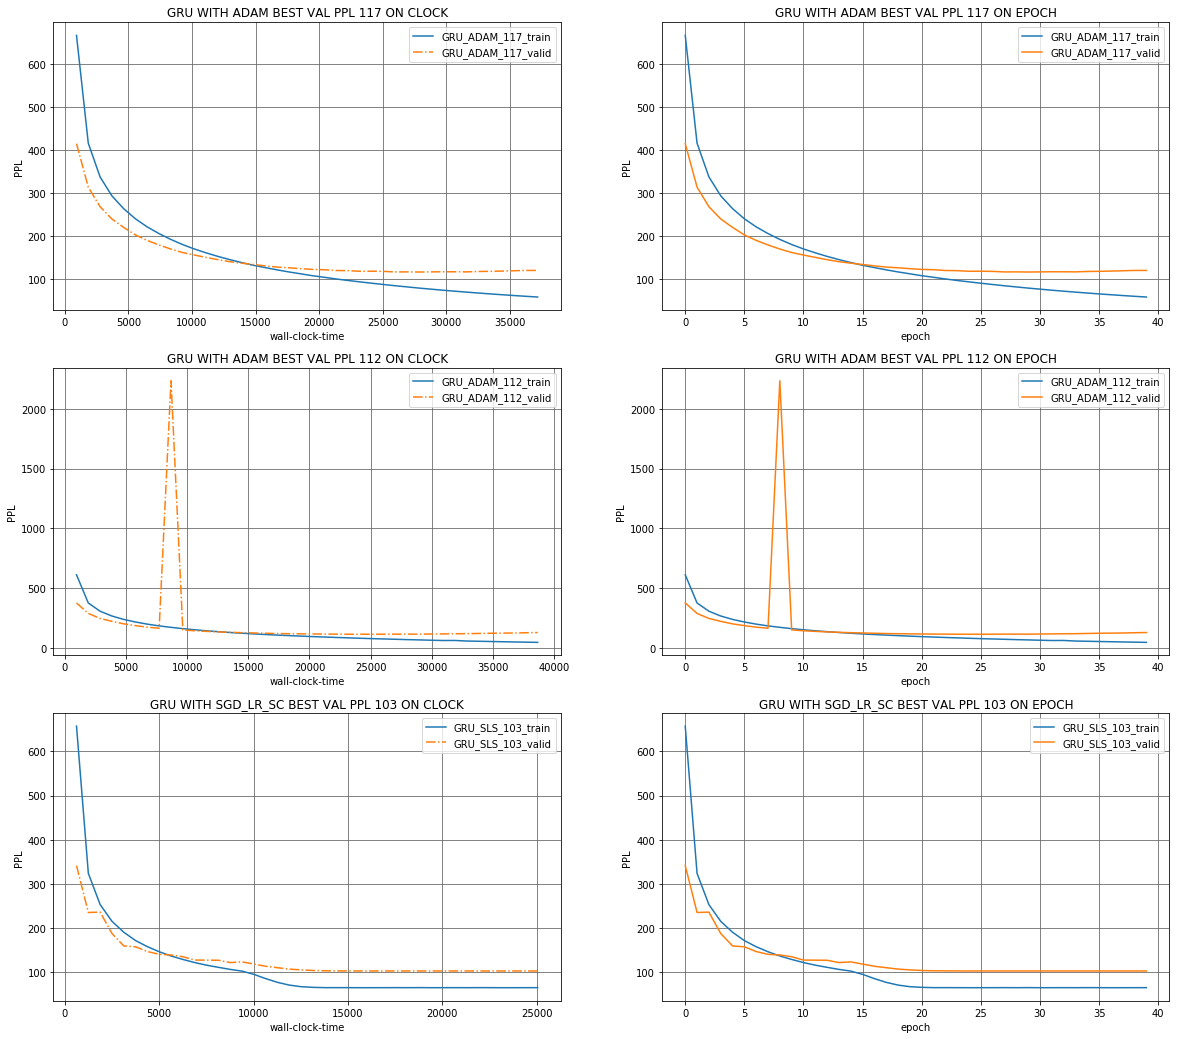

In [70]:
# 3 NEW GRU
result_gsls = readfile('9models/gru_sls_log.txt')
result_ga_111 = readfile('new_models/GRU_ADAM_117/log.txt')
result_ga_112 = readfile('new_models/GRU_ADAM_112/log.txt')
result_gsls_103 = readfile('new_models/GRU_SLS_103/log.txt')
plt.figure(figsize=(20,18))
plt.subplot(321)
drawontime(result_ga_111,"GRU_ADAM_117_train","GRU_ADAM_117_valid","GRU_ADAM_117 ON CLOCK")
plt.title('GRU WITH ADAM BEST VAL PPL 117 ON CLOCK')
plt.subplot(322)
drawonepoch('new_models/GRU_ADAM_117/learning_curves.npy',"GRU_ADAM_117_train","GRU_ADAM_117_valid","GRU_ADAM_117 ON EPOCH")
plt.title('GRU WITH ADAM BEST VAL PPL 117 ON EPOCH')
plt.subplot(323)
drawontime(result_ga_112,"GRU_ADAM_112_train","GRU_ADAM_112_valid","GRU_ADAM_112 ON CLOCK")
plt.title('GRU WITH ADAM BEST VAL PPL 112 ON CLOCK')
plt.subplot(324)
drawonepoch('new_models/GRU_ADAM_112/learning_curves.npy',"GRU_ADAM_112_train","GRU_ADAM_112_valid","GRU_ADAM_112 ON EPOCH")
plt.title('GRU WITH ADAM BEST VAL PPL 112 ON EPOCH')
plt.subplot(325)
drawontime(result_gsls_103,"GRU_SLS_103_train","GRU_SLS_103_valid","GRU_SLS_103 ON CLOCK")
plt.title('GRU WITH SGD_LR_SC BEST VAL PPL 103 ON CLOCK')
plt.subplot(326)
drawonepoch('new_models/GRU_SLS_103/learning_curves.npy',"GRU_SLS_103_train","GRU_SLS_103_valid","GRU_SLS_103 ON EPOCH")
plt.title('GRU WITH SGD_LR_SC BEST VAL PPL 103 ON EPOCH')

Text(0.5,1,'COMPARISON GRU MODEL IN 4.1 AND THREE NEW GRU WITH ADAM OR SGD_LR_SCHEDULE ON EPOCH')

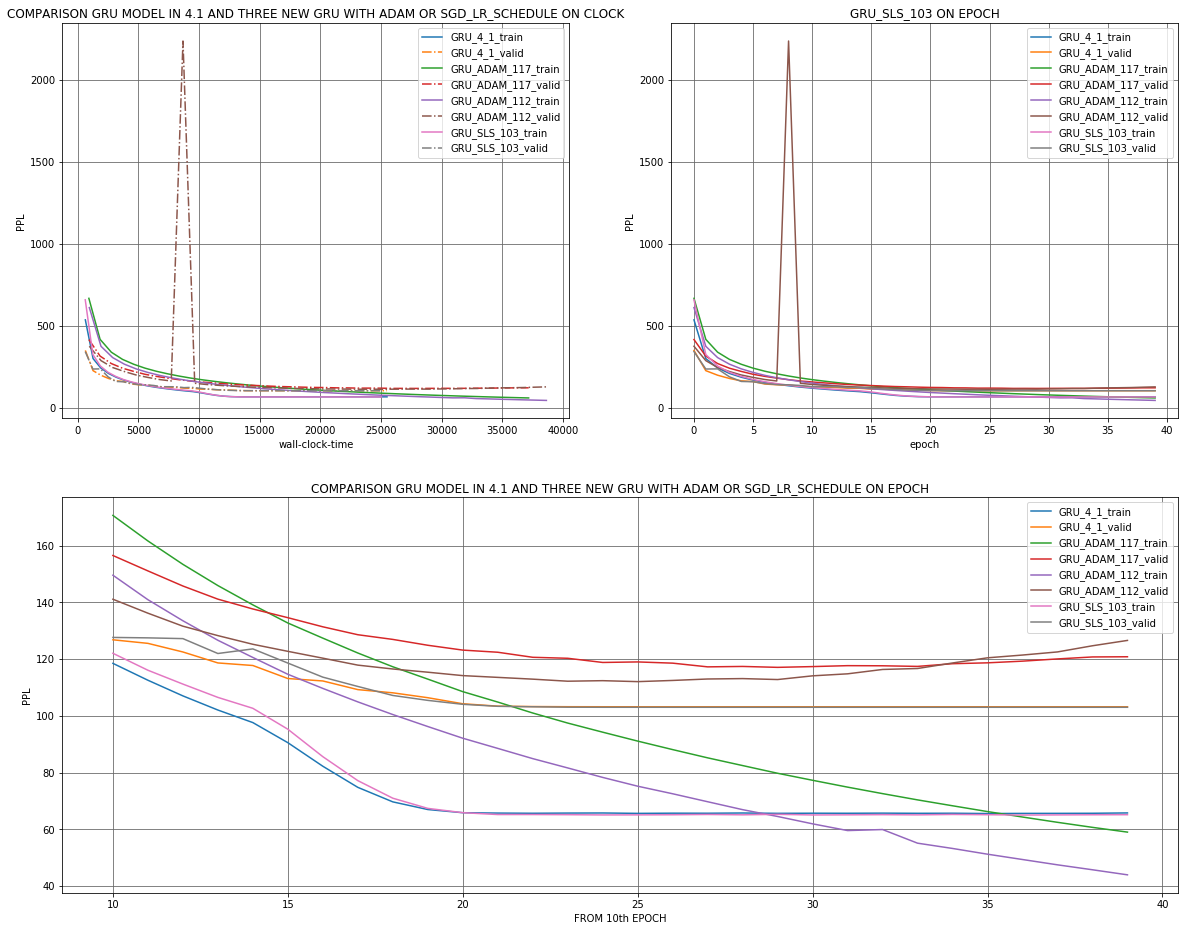

In [68]:
# comparison GRU
result_gsls = readfile('9models/gru_sls_log.txt')
result_ga_117 = readfile('new_models/GRU_ADAM_117/log.txt')
result_ga_112 = readfile('new_models/GRU_ADAM_112/log.txt')
result_gsls_103 = readfile('new_models/GRU_SLS_103/log.txt')
plt.figure(figsize=(20,16))
plt.subplot(221)
drawontime(result_gsls,"GRU_4_1_train","GRU_4_1_valid","GRU_SLS_4_1 ON CLOCK")
drawontime(result_ga_117,"GRU_ADAM_117_train","GRU_ADAM_117_valid","GRU_ADAM_117 ON CLOCK")
drawontime(result_ga_112,"GRU_ADAM_112_train","GRU_ADAM_112_valid","GRU_ADAM_112 ON CLOCK")
drawontime(result_gsls_103,"GRU_SLS_103_train","GRU_SLS_103_valid","GRU_SLS_103 ON CLOCK")
plt.title('COMPARISON GRU MODEL IN 4.1 AND THREE NEW GRU WITH ADAM OR SGD_LR_SCHEDULE ON CLOCK')

plt.subplot(222)
drawonepoch('9models/gru_sls_lc.npy',"GRU_4_1_train","GRU_4_1_valid","GRU_SLS_4_1 ON CLOCK")
drawonepoch('new_models/GRU_ADAM_117/learning_curves.npy',"GRU_ADAM_117_train","GRU_ADAM_117_valid","GRU_ADAM_117 ON EPOCH")
drawonepoch('new_models/GRU_ADAM_112/learning_curves.npy',"GRU_ADAM_112_train","GRU_ADAM_112_valid","GRU_ADAM_112 ON EPOCH")
drawonepoch('new_models/GRU_SLS_103/learning_curves.npy',"GRU_SLS_103_train","GRU_SLS_103_valid","GRU_SLS_103 ON EPOCH")


plt.subplot(212)
drawonepoch_from_10('9models/gru_sls_lc.npy',"GRU_4_1_train","GRU_4_1_valid","GRU_SLS_4_1 ON CLOCK")
drawonepoch_from_10('new_models/GRU_ADAM_117/learning_curves.npy',"GRU_ADAM_117_train","GRU_ADAM_117_valid","GRU_ADAM_117 ON EPOCH")
drawonepoch_from_10('new_models/GRU_ADAM_112/learning_curves.npy',"GRU_ADAM_112_train","GRU_ADAM_112_valid","GRU_ADAM_112 ON EPOCH")
drawonepoch_from_10('new_models/GRU_SLS_103/learning_curves.npy',"GRU_SLS_103_train","GRU_SLS_103_valid","GRU_SLS_103 ON EPOCH")

plt.title('COMPARISON GRU MODEL IN 4.1 AND THREE NEW GRU WITH ADAM OR SGD_LR_SCHEDULE ON EPOCH')

# 3 NEW GRU


In [65]:
def drawonepoch_from_10(filepath, train_name, val_name, fig_name):
    matrix_ga = np.load(filepath) #filepath = '9models/gru_adam_lc.npy'
    y_ga_t = matrix_ga.item()['train_ppls']
    y_ga_v = matrix_ga.item()['val_ppls']
    n = len(y_ga_t)
    x = np.arange(10,n)
    plt.plot(x,y_ga_t[10:n],label=train_name)
    plt.plot(x,y_ga_v[10:n],label=val_name)
    plt.xlabel('FROM 10th EPOCH')
    plt.ylabel("PPL")
    plt.title(fig_name)
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.legend(loc='upper right')

In [74]:
def drawonepoch_val(filepath, val_name):
    matrix_ga = np.load(filepath) #filepath = '9models/gru_adam_lc.npy'
    y_ga_v = matrix_ga.item()['val_ppls']
    n = len(y_ga_v)
    x = np.arange(n)
    plt.plot(x,y_ga_v,label=val_name)
    plt.legend(loc='upper right')

In [83]:
def drawontime_val(result, val_name):
    n,m = result.shape
    x = n
    val_ppl = result[:,1]
    time = np.zeros(n)
    time[0] = result[0,-1]
    for i in range(n-1):
        time[i+1] = time[i]+result[i+1,-1]
    plt.plot(time,val_ppl,label=val_name)
    plt.legend(loc='upper right')

In [72]:
# read file
#4.1 4.2
result_gsls = readfile('9models/gru_sls_log.txt')
result_ga = readfile('9models/gru_adam_log.txt')
result_gs = readfile('9models/gru_sgd_log.txt')
result_tsls = readfile('9models/tran_sls_log.txt')
result_ta = readfile('9models/tran_adam_log.txt')
result_ts = readfile('9models/tran_sgd_log.txt')
result_rsls = readfile('9models/rnn_sls_log.txt')
result_ra = readfile('9models/rnn_adam_log.txt')
result_rs = readfile('9models/rnn_sgd_log.txt')
#4.3
result_ga_117 = readfile('new_models/GRU_ADAM_117/log.txt')
result_ga_112 = readfile('new_models/GRU_ADAM_112/log.txt')
result_gsls_103 = readfile('new_models/GRU_SLS_103/log.txt')
result_ta_119 = readfile('new_models/TRANS_ADAM_119/log.txt')
result_ta_120 = readfile('new_models/TRANS_ADAM_120/log.txt')
result_ta_121 = readfile('new_models/TRANS_ADAM_121/log.txt')
result_ra_new1 = readfile('new_models/RNN_ADAM_154/log.txt')
result_ra_new2 = readfile('new_models/RNN_ADAM_145/log.txt')
result_ra_new3 = readfile('new_models/RNN_ADAM_159/log.txt')


Text(0.5,1,'ALL MODELS WITH SGD')

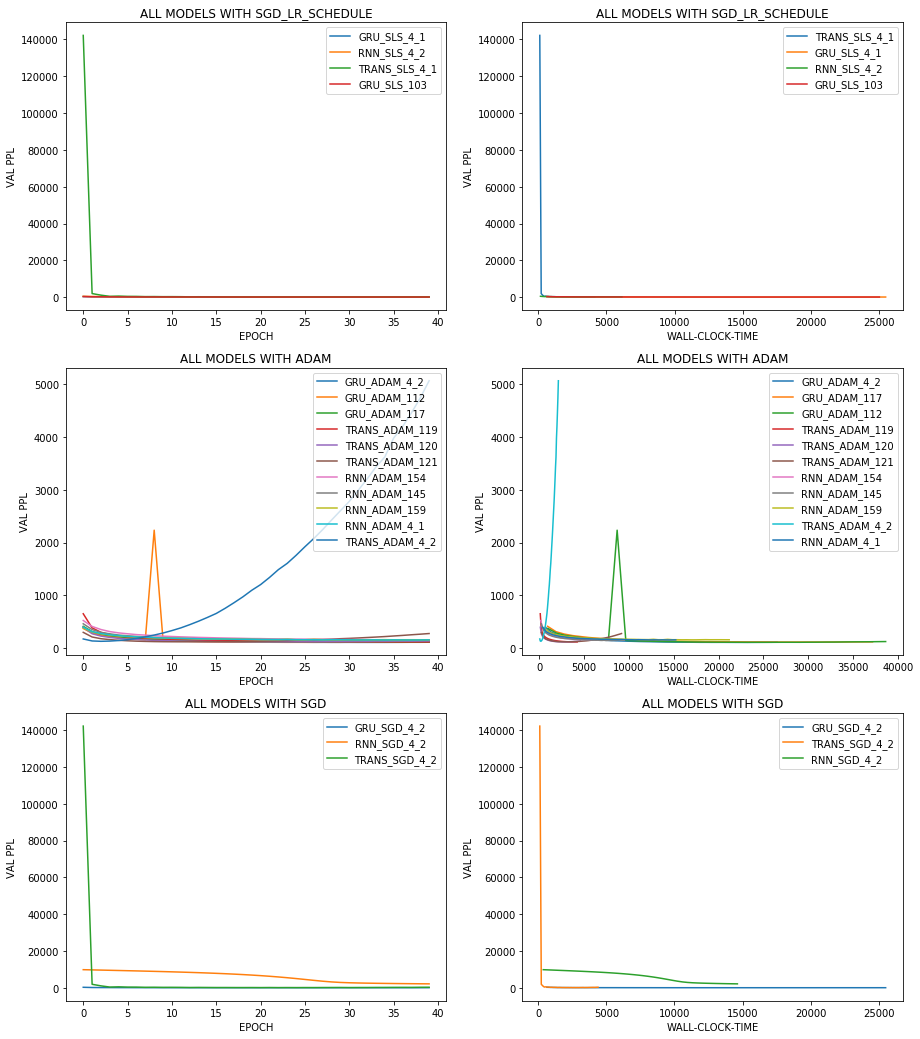

In [92]:
# Make 2 plots for each optimizer; one which has all of the validation curves for that optimizer 
# over epochs and one over wall-clock-time
plt.figure(figsize=(15,18))

# EPOCH
# SLS
plt.subplot(321)
drawonepoch_val('9models/gru_sls_lc.npy', 'GRU_SLS_4_1')
drawonepoch_val('9models/rnn_sls_lc.npy', 'RNN_SLS_4_2')
drawonepoch_val('9models/tran_sls_lc.npy', 'TRANS_SLS_4_1')
drawonepoch_val('new_models/GRU_SLS_103/learning_curves.npy', 'GRU_SLS_103')
plt.xlabel('EPOCH')
plt.ylabel("VAL PPL")
plt.title("ALL MODELS WITH SGD_LR_SCHEDULE")

# ADAM
plt.subplot(323)
drawonepoch_val('9models/gru_adam_lc.npy', 'GRU_ADAM_4_2')
drawonepoch_val('new_models/GRU_ADAM_112/learning_curves.npy', 'GRU_ADAM_112')
drawonepoch_val('new_models/GRU_ADAM_117/learning_curves.npy', 'GRU_ADAM_117')
drawonepoch_val('new_models/TRANS_ADAM_119/learning_curves.npy', 'TRANS_ADAM_119')
drawonepoch_val('new_models/TRANS_ADAM_120/learning_curves.npy', 'TRANS_ADAM_120')
drawonepoch_val('new_models/TRANS_ADAM_121/learning_curves.npy', 'TRANS_ADAM_121')
drawonepoch_val('new_models/RNN_ADAM_154/learning_curves.npy', 'RNN_ADAM_154')
drawonepoch_val('new_models/RNN_ADAM_145/learning_curves.npy', 'RNN_ADAM_145')
drawonepoch_val('new_models/RNN_ADAM_159/learning_curves.npy', 'RNN_ADAM_159')
drawonepoch_val('9models/rnn_adam_lc.npy', 'RNN_ADAM_4_1')
drawonepoch_val('9models/tran_adam_lc.npy', 'TRANS_ADAM_4_2')

plt.xlabel('EPOCH')
plt.ylabel("VAL PPL")
plt.title("ALL MODELS WITH ADAM")

# SGD
plt.subplot(325)
drawonepoch_val('9models/gru_sgd_lc.npy', 'GRU_SGD_4_2')
drawonepoch_val('9models/rnn_sgd_lc.npy', 'RNN_SGD_4_2')
drawonepoch_val('9models/tran_sgd_lc.npy', 'TRANS_SGD_4_2')

plt.xlabel('EPOCH')
plt.ylabel("VAL PPL")
plt.title("ALL MODELS WITH SGD")
    
# CLOCK
# SLS
plt.subplot(322)
drawontime_val(result_tsls, 'TRANS_SLS_4_1')
drawontime_val(result_gsls, 'GRU_SLS_4_1')
drawontime_val(result_rsls, 'RNN_SLS_4_2')
drawontime_val(result_gsls_103, 'GRU_SLS_103')

plt.xlabel('WALL-CLOCK-TIME')
plt.ylabel("VAL PPL")
plt.title("ALL MODELS WITH SGD_LR_SCHEDULE")

#ADAM
plt.subplot(324)
drawontime_val(result_ga, 'GRU_ADAM_4_2')
drawontime_val(result_ga_117, 'GRU_ADAM_117')
drawontime_val(result_ga_112, 'GRU_ADAM_112')
drawontime_val(result_ta_119, 'TRANS_ADAM_119')
drawontime_val(result_ta_120, 'TRANS_ADAM_120')
drawontime_val(result_ta_121, 'TRANS_ADAM_121')
drawontime_val(result_ra_new1, 'RNN_ADAM_154')
drawontime_val(result_ra_new2, 'RNN_ADAM_145')
drawontime_val(result_ra_new3, 'RNN_ADAM_159')
drawontime_val(result_ta, 'TRANS_ADAM_4_2')
drawontime_val(result_ra, 'RNN_ADAM_4_1')

plt.xlabel('WALL-CLOCK-TIME')
plt.ylabel("VAL PPL")
plt.title("ALL MODELS WITH ADAM")

# SGD
plt.subplot(326)
drawontime_val(result_gs, 'GRU_SGD_4_2')
drawontime_val(result_ts, 'TRANS_SGD_4_2')
drawontime_val(result_rs, 'RNN_SGD_4_2')

plt.xlabel('WALL-CLOCK-TIME')
plt.ylabel("VAL PPL")
plt.title("ALL MODELS WITH SGD")




Text(0.5,1,'ALL MODELS OF TRANSFORMER')

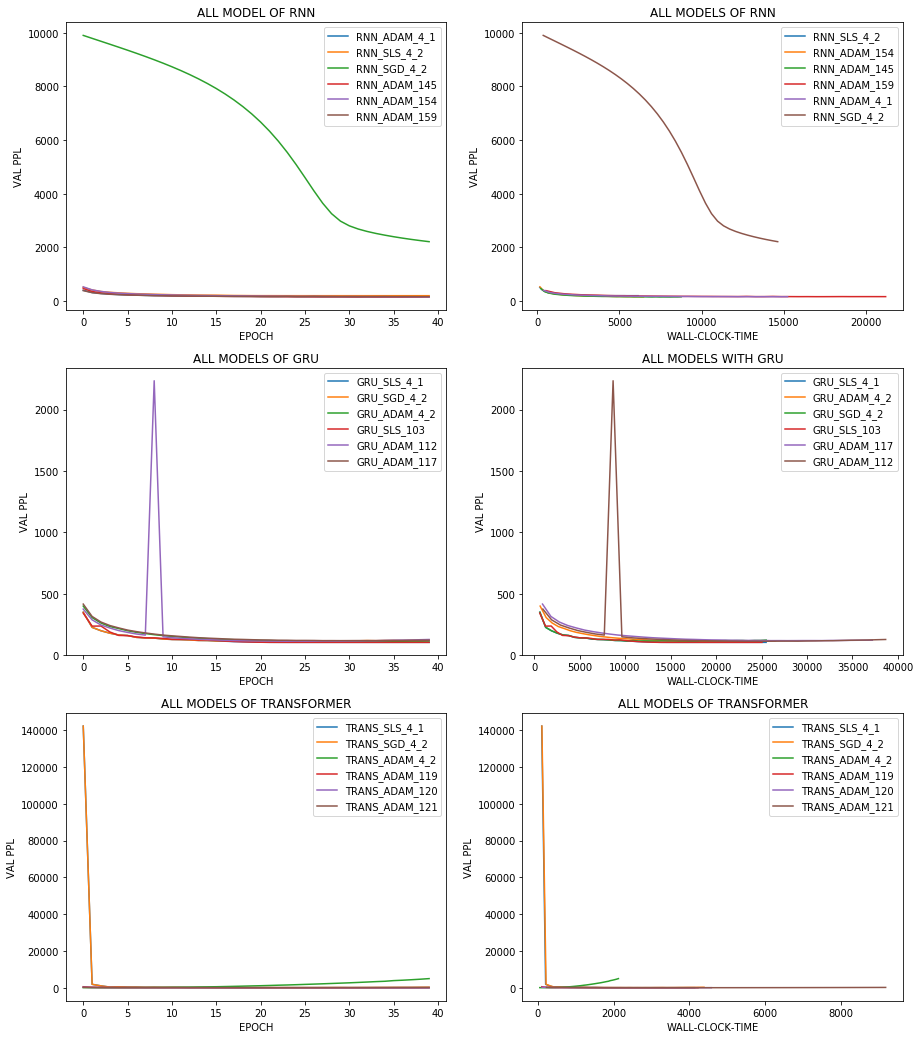

In [94]:
# Make 2 plots for each arcitecture; one which has all of the validation curves for that architecture over
# epochs and one over wall-clock-time

plt.figure(figsize=(15,18))

# EPOCH
# RNN

plt.subplot(321)
drawonepoch_val('9models/rnn_adam_lc.npy', 'RNN_ADAM_4_1')
drawonepoch_val('9models/rnn_sls_lc.npy', 'RNN_SLS_4_2')
drawonepoch_val('9models/rnn_sgd_lc.npy', 'RNN_SGD_4_2')
drawonepoch_val('new_models/RNN_ADAM_145/learning_curves.npy', 'RNN_ADAM_145')
drawonepoch_val('new_models/RNN_ADAM_154/learning_curves.npy', 'RNN_ADAM_154')
drawonepoch_val('new_models/RNN_ADAM_159/learning_curves.npy', 'RNN_ADAM_159')
plt.xlabel('EPOCH')
plt.ylabel("VAL PPL")
plt.title("ALL MODEL OF RNN")

# GRU
plt.subplot(323)
drawonepoch_val('9models/gru_sls_lc.npy', 'GRU_SLS_4_1')
drawonepoch_val('9models/gru_sgd_lc.npy', 'GRU_SGD_4_2')
drawonepoch_val('9models/gru_adam_lc.npy', 'GRU_ADAM_4_2')
drawonepoch_val('new_models/GRU_SLS_103/learning_curves.npy', 'GRU_SLS_103')
drawonepoch_val('new_models/GRU_ADAM_112/learning_curves.npy', 'GRU_ADAM_112')
drawonepoch_val('new_models/GRU_ADAM_117/learning_curves.npy', 'GRU_ADAM_117')

plt.xlabel('EPOCH')
plt.ylabel("VAL PPL")
plt.title("ALL MODELS OF GRU")

# TRANSFORMER
plt.subplot(325)
drawonepoch_val('9models/tran_sls_lc.npy', 'TRANS_SLS_4_1')
drawonepoch_val('9models/tran_sgd_lc.npy', 'TRANS_SGD_4_2')
drawonepoch_val('9models/tran_adam_lc.npy', 'TRANS_ADAM_4_2')
drawonepoch_val('new_models/TRANS_ADAM_119/learning_curves.npy', 'TRANS_ADAM_119')
drawonepoch_val('new_models/TRANS_ADAM_120/learning_curves.npy', 'TRANS_ADAM_120')
drawonepoch_val('new_models/TRANS_ADAM_121/learning_curves.npy', 'TRANS_ADAM_121')

plt.xlabel('EPOCH')
plt.ylabel("VAL PPL")
plt.title("ALL MODELS OF TRANSFORMER")
    
# CLOCK
# RNN
plt.subplot(322)
drawontime_val(result_rsls, 'RNN_SLS_4_2')
drawontime_val(result_ra_new1, 'RNN_ADAM_154')
drawontime_val(result_ra_new2, 'RNN_ADAM_145')
drawontime_val(result_ra_new3, 'RNN_ADAM_159')
drawontime_val(result_ra, 'RNN_ADAM_4_1')
drawontime_val(result_rs, 'RNN_SGD_4_2')
plt.xlabel('WALL-CLOCK-TIME')
plt.ylabel("VAL PPL")
plt.title("ALL MODELS OF RNN")

# GRU
plt.subplot(324)
drawontime_val(result_gsls, 'GRU_SLS_4_1')
drawontime_val(result_ga, 'GRU_ADAM_4_2')
drawontime_val(result_gs, 'GRU_SGD_4_2')
drawontime_val(result_gsls_103, 'GRU_SLS_103')
drawontime_val(result_ga_117, 'GRU_ADAM_117')
drawontime_val(result_ga_112, 'GRU_ADAM_112')

plt.xlabel('WALL-CLOCK-TIME')
plt.ylabel("VAL PPL")
plt.title("ALL MODELS WITH GRU")

# TRANSFORMER
plt.subplot(326)
drawontime_val(result_tsls, 'TRANS_SLS_4_1')
drawontime_val(result_ts, 'TRANS_SGD_4_2')
drawontime_val(result_ta, 'TRANS_ADAM_4_2')
drawontime_val(result_ta_119, 'TRANS_ADAM_119')
drawontime_val(result_ta_120, 'TRANS_ADAM_120')
drawontime_val(result_ta_121, 'TRANS_ADAM_121')

plt.xlabel('WALL-CLOCK-TIME')
plt.ylabel("VAL PPL")
plt.title("ALL MODELS OF TRANSFORMER")


